In [9]:
!pip install dputils -q

In [2]:
url = "https://digipodium.com/mining-demo.html"

In [3]:
from dputils.scrape import Scraper, Tag

In [4]:
scr = Scraper(url)

In [6]:
result = scr.get_repeating_date_from_page(
    target=Tag(cls='item-list'),
    items=Tag(cls="card"),
    title = Tag('h4'),
    price = Tag('h1', cls="pricing-card-title"),
    oprice = Tag('li', cls='o-price')
)

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.DataFrame(result)
df

,title,price,oprice
0,LuxoWatch,₹5949.82,₹7436.88
1,SuperPhone X,₹67118.07,₹79044.38
2,Miracle Blender,₹3689.88,₹5273.51
3,Quantum Headphones,₹9709.69,₹12922.74
4,SmartFridge,₹89699.05,₹109295.41
5,Galactic Glasses,₹2234.52,₹2488.20
6,PowerJuicer,₹6651.27,₹8536.48
7,iSpectre Laptop,₹119647.11,₹149208.92
8,HealthBand,₹5228.64,₹5949.82
9,MaxiSound Speaker,₹14908.25,₹22972.57


In [10]:
df.price = df.price.apply(lambda p:p[1:]).astype(float)
df

,title,price,oprice
0,LuxoWatch,5949.82,₹7436.88
1,SuperPhone X,67118.07,₹79044.38
2,Miracle Blender,3689.88,₹5273.51
3,Quantum Headphones,9709.69,₹12922.74
4,SmartFridge,89699.05,₹109295.41
5,Galactic Glasses,2234.52,₹2488.20
6,PowerJuicer,6651.27,₹8536.48
7,iSpectre Laptop,119647.11,₹149208.92
8,HealthBand,5228.64,₹5949.82
9,MaxiSound Speaker,14908.25,₹22972.57


In [11]:
df.oprice = df.oprice.apply(lambda p:p[1:]).astype(float)
df

,title,price,oprice
0,LuxoWatch,5949.82,7436.88
1,SuperPhone X,67118.07,79044.38
2,Miracle Blender,3689.88,5273.51
3,Quantum Headphones,9709.69,12922.74
4,SmartFridge,89699.05,109295.41
5,Galactic Glasses,2234.52,2488.20
6,PowerJuicer,6651.27,8536.48
7,iSpectre Laptop,119647.11,149208.92
8,HealthBand,5228.64,5949.82
9,MaxiSound Speaker,14908.25,22972.57


In [13]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1eiMU9WIAAxItky-Y8VB9P9ZLsak58kp37nKoXUH4uGo#gid=0


<Axes: xlabel='oprice', ylabel='price'>

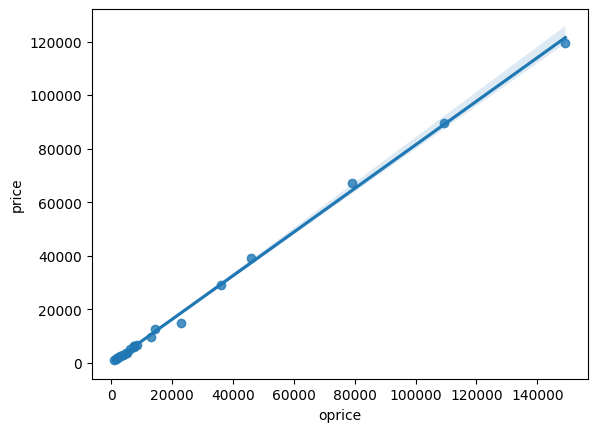

In [12]:
sns.regplot(data=df, x='oprice', y='price')